K-Fold Average Score: 0.4816


l:\Foundations of Machine Learning Frameworks\testInClass\inclassvenv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


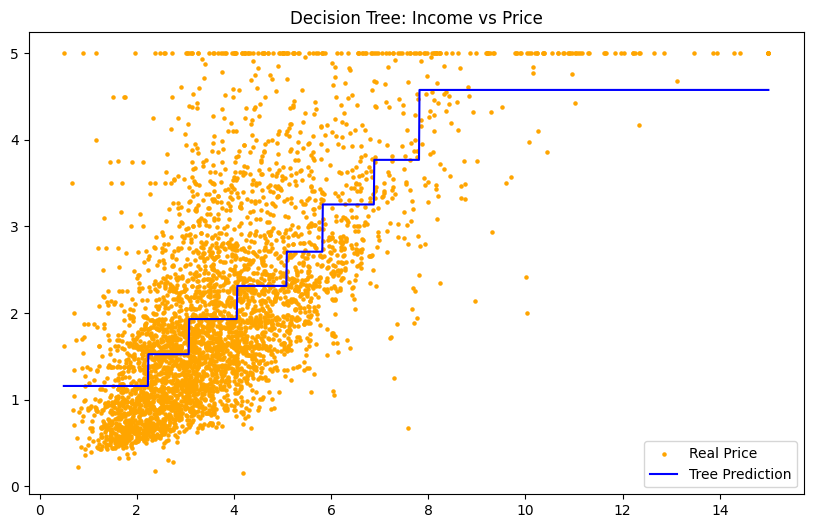

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split

# 1. Load the data
# We use California house price data from 1990
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target 

# We pick only 1 feature (Income) to show a simple 2D picture
X_simple = X[['MedInc']]

# 2. Split the data
# We use 80% to train and 20% to test
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# 3. Create the Model
# max_depth=3 means the tree is small and simple
model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

# 4. Use K-Fold
# This checks the model 5 times with different data parts
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kf)

print(f"K-Fold Average Score: {scores.mean():.4f}")

# 5. Train and Draw
model.fit(X_train, y_train)

# Make a smooth line for the plot
X_grid = np.arange(X_simple.min().iloc[0], X_simple.max().iloc[0], 0.01)[:, np.newaxis]
y_grid = model.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, s=5, color="orange", label="Real Price")
plt.plot(X_grid, y_grid, color="blue", label="Tree Prediction")
plt.title("Decision Tree: Income vs Price")
plt.legend()
plt.show()

1. What is a Decision Tree?

It is a model that asks "Yes" or "No" questions to find an answer. In regression, it takes the average of house prices in a small group to make a prediction. It looks like a staircase.

2. How was the data generated?

The data comes from the 1990 US Census. It has information about California houses, like how many rooms they have and how much money the owners make.

3. Is the data a good fit for Decision Trees?

Yes. House prices are not always in a straight line. They change a lot in different areas. Decision trees are good because they can find these complex patterns.

4. K-fold? Or not? Why?

Yes, use K-fold. A decision tree can be "lucky" with one test. K-fold tests the model 5 or 10 times with different data. This proves the model is truly good.

5. Hyperparameters (The settings)

The whole set: We use these to stop the tree from becoming too big and "memorizing" the data (Overfitting).

max_depth: This is how many levels the tree has. If it is too big, the model is too complex.

min_samples_leaf: This is the minimum number of houses in one "leaf" group. It makes the prediction line smoother.